# 测试集测试

In [13]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import cv2
from datetime import datetime
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


model = torch.load("C:\\Users\\asus\\Desktop\\项目1\\Adadelta_20200805_131134_model.pth",map_location=torch.device('cpu'))
def predict(path):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    global model
    model = model.to(device)

    model.eval()  # 预测模式

    # 获取测试图片，并行相应的处理
    img = Image.open(path)
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    img = img.convert("RGB")  # 如果是标准的RGB格式，则可以不加
    img = transform(img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        py = model(img)
    #print(py)
    _, predicted = torch.max(py, 1)# 获取分类结果
    classIndex_ = predicted[0]
    
    test_dataloader.append((i,int(predicted)))
    return classIndex_.item()

test_dataloader=[]
if __name__ == '__main__':
    path = 'C:\\Users\\asus\\Desktop\\项目1\\test'
    dirs = ["charming", "delicate", "nature", "party", "sporting"]
    i = 0
    for dir in dirs:
        t_path = os.path.join(path, dir)
        img_list = os.listdir(t_path)
        all = len(img_list)
        cor = 0
        for img in img_list:
            #test_dataloader.append(i,int(predicted))
            if predict(os.path.join(t_path, img)) == i:
                cor += 1
        i += 1
        print(dir+"'s Accuracy: "+str(float(cor)/all))

charming's Accuracy: 0.9104477611940298
delicate's Accuracy: 0.9836065573770492
nature's Accuracy: 0.971830985915493
party's Accuracy: 0.7659574468085106
sporting's Accuracy: 0.9634146341463414


In [14]:
model = torch.load("C:\\Users\\asus\\Desktop\\项目1\\Adam_20200805_152621_model.pth",map_location=torch.device('cpu'))
def predict(path):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    global model
    model = model.to(device)

    model.eval()  # 预测模式

    # 获取测试图片，并行相应的处理
    img = Image.open(path)
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    img = img.convert("RGB")  # 如果是标准的RGB格式，则可以不加
    img = transform(img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        py = model(img)
    #print(py)
    _, predicted = torch.max(py, 1)# 获取分类结果
    classIndex_ = predicted[0]
    
    test_dataloader2.append((i,int(predicted)))
    return classIndex_.item()

test_dataloader2=[]
if __name__ == '__main__':
    path = 'C:\\Users\\asus\\Desktop\\项目1\\test'
    dirs = ["charming", "delicate", "nature", "party", "sporting"]
    i = 0
    for dir in dirs:
        t_path = os.path.join(path, dir)
        img_list = os.listdir(t_path)
        all = len(img_list)
        cor = 0
        for img in img_list:
            #test_dataloader.append(i,int(predicted))
            if predict(os.path.join(t_path, img)) == i:
                cor += 1
        i += 1
        print(dir+"'s Accuracy: "+str(float(cor)/all))

charming's Accuracy: 0.8805970149253731
delicate's Accuracy: 1.0
nature's Accuracy: 0.971830985915493
party's Accuracy: 0.8936170212765957
sporting's Accuracy: 0.9878048780487805


In [9]:
model = torch.load("C:\\Users\\asus\\Desktop\\项目1\\Adabound_20200805_151357_model.pth",map_location=torch.device('cpu'))
def predict(path):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    global model
    model = model.to(device)

    model.eval()  # 预测模式

    # 获取测试图片，并行相应的处理
    img = Image.open(path)
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    img = img.convert("RGB")  # 如果是标准的RGB格式，则可以不加
    img = transform(img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        py = model(img)
    #print(py)
    _, predicted = torch.max(py, 1)# 获取分类结果
    classIndex_ = predicted[0]
    
    test_dataloader3.append((i,int(predicted)))
    return classIndex_.item()

test_dataloader3=[]
if __name__ == '__main__':
    path = 'C:\\Users\\asus\\Desktop\\项目1\\test'
    dirs = ["charming", "delicate", "nature", "party", "sporting"]
    i = 0
    for dir in dirs:
        t_path = os.path.join(path, dir)
        img_list = os.listdir(t_path)
        all = len(img_list)
        cor = 0
        for img in img_list:
            #test_dataloader.append(i,int(predicted))
            if predict(os.path.join(t_path, img)) == i:
                cor += 1
        i += 1
        print(dir+"'s Accuracy: "+str(float(cor)/all))

charming's Accuracy: 0.9104477611940298
delicate's Accuracy: 1.0
nature's Accuracy: 0.9859154929577465
party's Accuracy: 0.851063829787234
sporting's Accuracy: 0.9878048780487805


# 混淆矩阵

In [15]:
import matplotlib.pyplot as plt
import numpy as np
# 分类模型测试阶段代码

# 创建一个空矩阵存储混淆矩阵
conf_matrix = torch.zeros(5,5)
for x,y in test_dataloader:
    if x!=y:
        conf_matrix[x][y]+=1
        
    else:
        conf_matrix[y][x]+=1

In [16]:
conf_matrix2 = torch.zeros(5,5)
for x,y in test_dataloader2:
    if x!=y:
        conf_matrix2[x][y]+=1
       
    else:
        conf_matrix2[y][x]+=1

In [17]:
conf_matrix3 = torch.zeros(5,5)
for x,y in test_dataloader3:
    if x!=y:
        conf_matrix3[x][y]+=1
    else:
        conf_matrix3[y][x]+=1

In [18]:
# 绘制混淆矩阵
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges):
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

	# x,y轴长度一致
    plt.axis("equal")
    # x轴处理一下，如果x轴或者y轴两边有空白的话
    ax = plt.gca()  # 获得当前axis
    left, right = plt.xlim()  # 获得x轴最大最小值
    ax.spines['left'].set_position(('data', left))
    ax.spines['right'].set_position(('data', right))
    for edge_i in ['top', 'bottom', 'right', 'left']:
        ax.spines[edge_i].set_edgecolor("white")


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        num = '{:.2f}'.format(cm[i, j]) if normalize else int(cm[i, j])
        plt.text(j, i, num,
                 verticalalignment='center',
                 horizontalalignment="center",
                 color="white" if num > thresh else "black")
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    #直接显示百分比（缩放比例有问题）
    #fmt = 'd'
    #thresh = cm.max() / 2.
    #for i in range(cm.shape[0]):
    #   for j in range(cm.shape[1]):
    #       ax.text(i, j, cm[i, j],ha="center", va="center",color="white"  if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

====Adadelta====
tensor([[61.,  0.,  0.,  5.,  1.],
        [ 1., 60.,  0.,  0.,  0.],
        [ 0.,  0., 69.,  0.,  2.],
        [ 6.,  2.,  1., 36.,  2.],
        [ 1.,  2.,  0.,  0., 79.]])


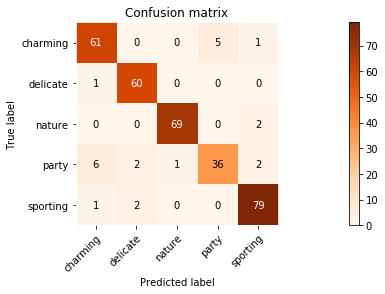

====Adam====
tensor([[59.,  0.,  1.,  6.,  1.],
        [ 0., 61.,  0.,  0.,  0.],
        [ 0.,  0., 69.,  0.,  2.],
        [ 1.,  2.,  1., 42.,  1.],
        [ 0.,  1.,  0.,  0., 81.]])


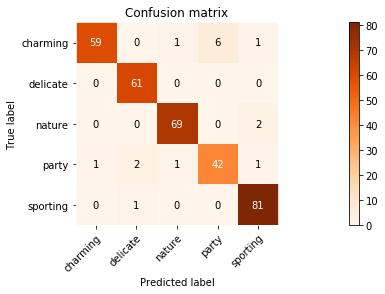

====Adabound====
tensor([[61.,  0.,  0.,  5.,  1.],
        [ 0., 61.,  0.,  0.,  0.],
        [ 0.,  0., 70.,  0.,  1.],
        [ 5.,  0.,  0., 40.,  2.],
        [ 0.,  0.,  1.,  0., 81.]])


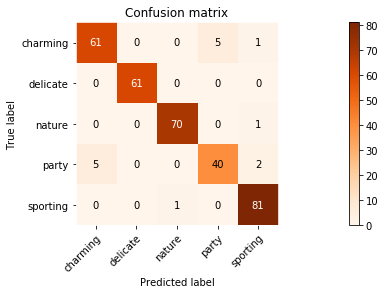

In [19]:
import itertools
print("====Adadelta====")
plot_confusion_matrix(conf_matrix, dirs, normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges)
print("====Adam====")
plot_confusion_matrix(conf_matrix2, dirs, normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges)
print("====Adabound====")
plot_confusion_matrix(conf_matrix3, dirs, normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges)

In [20]:
data=[[61.,  0.,  0.,  5.,  1.],
        [ 0., 61.,  0.,  0.,  0.],
        [ 0.,  0., 70.,  0.,  1.],
        [ 5.,  0.,  0., 40.,  2.],
        [ 0.,  0.,  1.,  0., 81.]]

In [21]:
for i in range(5):
    precision=data[i][i]/(data[0][i]+data[1][i]+data[2][i]+data[3][i]+data[4][i])
    print(precision)

0.9242424242424242
1.0
0.9859154929577465
0.8888888888888888
0.9529411764705882


In [22]:
for i in range(5):
    recall=data[i][i]/(data[i][0]+data[i][1]+data[i][2]+data[i][3]+data[i][4])
    print(recall)

0.9104477611940298
1.0
0.9859154929577465
0.851063829787234
0.9878048780487805


# 使用模型

In [25]:
model = torch.load("C:\\Users\\asus\\Desktop\\项目1\\Adadelta_20200805_131134_model.pth",map_location=torch.device('cpu'))
def predict(path):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    global model
    model = model.to(device)

    model.eval()  # 预测模式

    # 获取测试图片，并行相应的处理
    img = Image.open(path)
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    img = img.convert("RGB")  # 如果是标准的RGB格式，则可以不加
    img = transform(img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        py = model(img)
    #print(py)
    p = torch.nn.functional.softmax(py, dim=1)
    return p



predict("C:\\Users\\asus\\Desktop\\00016.jpg")

tensor([[0.1123, 0.0553, 0.7931, 0.0201, 0.0193]])

In [31]:
from pyecharts import Pie

attr = ["charming", "delicate", "nature", "party", "sporting"]
v1 = [0.1123, 0.0553, 0.7931, 0.0201, 0.0193]
pie = Pie("Proportion")
pie.add(
    "",
    attr,
    v1,
    radius=[40, 75],
    is_label_show=True,
    is_more_utils=True,
    label_text_color=None,

    legend_orient="vertical",

    legend_pos="right",
)
pie.render(path="C:\\Users\\asus\\Desktop\\Bing1.html")

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import cv2
from datetime import datetime
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


model = torch.load("C:\\Users\\asus\\Desktop\\项目1\\Adabound_20200801_110708_model.pth",map_location=torch.device('cpu'))
def predict(path):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    global model
    model = model.to(device)

    model.eval()  # 预测模式

    # 获取测试图片，并行相应的处理
    img = Image.open(path)
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    img = img.convert("RGB")  # 如果是标准的RGB格式，则可以不加
    img = transform(img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        py = model(img)
        p = torch.nn.functional.softmax(py, dim=1)
        
        #loss = torch.nn.functional.nll_loss(torch.log(p), y)
    return p
    #_, predicted = torch.max(py, 1)# 获取分类结果
    #classIndex_ = predicted[0]
    #test_dataloader.append(classIndex_)
    
    #test_dataloader.append((i,int(predicted)))
    #return classIndex_.item()

test_dataloader=[0,0,0,0,0,0,0,0]
if __name__ == '__main__':
    data=[]
    path = 'C:\\Users\\asus\\Desktop\\项目1\\resNet图片风格识别'
    hyperdirs=["官图","UGC图片"]
    dirs = ["drab", "dull", "fun", "gentle", "glamorous", "healthy", "rugged", "unhealthy"]
    dirs2 = ["百威", "喜力"]
    for hyperdir in hyperdirs:
        print(str(hyperdir)+"中品牌风格组成为：")
        for dir2 in dirs2:
            print(dir2)
            t_path = os.path.join(path,hyperdir,dir2)
            img_list = os.listdir(t_path)
            all = len(img_list)
            cor = 0
            for img in img_list:
                #test_dataloader.append(i,int(predicted))
                img_attribute=predict(os.path.join(t_path, img)).tolist()
                #print(img_attribute)
                for t in range(len(dirs)):
                    test_dataloader[t]+= img_attribute[0][t]
                t=0
            #print(test_dataloader)
            for ind in range(len(dirs)):
                print(dirs[ind]+"占比为： "+str(test_dataloader[ind]/all))
            data.append([x/all for x in test_dataloader])
            test_dataloader=[0,0,0,0,0,0,0,0]

官图中品牌风格组成为：
百威
drab占比为： 0.2213633808773011
dull占比为： 0.023115549702197313
fun占比为： 0.320445465145167
gentle占比为： 0.050538160919677465
glamorous占比为： 0.019108332556788808
healthy占比为： 0.1941335710536805
rugged占比为： 0.13707613466540353
unhealthy占比为： 0.034219416812993585
喜力
drab占比为： 0.03543642107920796
dull占比为： 0.018186718077713705
fun占比为： 0.16682157972858805
gentle占比为： 0.05003957505999664
glamorous占比为： 0.01273405529613741
healthy占比为： 0.5683994348092167
rugged占比为： 0.07707981077658056
unhealthy占比为： 0.07130240693988416
UGC图片中品牌风格组成为：
百威
drab占比为： 0.07052553628295291
dull占比为： 0.022868932874783296
fun占比为： 0.282510197094353
gentle占比为： 0.04956670201678133
glamorous占比为： 0.01765279873551644
healthy占比为： 0.3941835485213455
rugged占比为： 0.10819530644733519
unhealthy占比为： 0.05449697832732547
喜力
drab占比为： 0.07232809076663069
dull占比为： 0.02436350808477014
fun占比为： 0.30003354510972124
gentle占比为： 0.043948741865930174
glamorous占比为： 0.015139381216760095
healthy占比为： 0.38648782065626414
rugged占比为： 0.10544405688772038
unh

In [17]:
data

[[0.2213633808773011,
  0.023115549702197313,
  0.320445465145167,
  0.050538160919677465,
  0.019108332556788808,
  0.1941335710536805,
  0.13707613466540353,
  0.034219416812993585],
 [0.03543642107920796,
  0.018186718077713705,
  0.16682157972858805,
  0.05003957505999664,
  0.01273405529613741,
  0.5683994348092167,
  0.07707981077658056,
  0.07130240693988416],
 [0.07052553628295291,
  0.022868932874783296,
  0.282510197094353,
  0.04956670201678133,
  0.01765279873551644,
  0.3941835485213455,
  0.10819530644733519,
  0.05449697832732547],
 [0.07232809076663069,
  0.02436350808477014,
  0.30003354510972124,
  0.043948741865930174,
  0.015139381216760095,
  0.38648782065626414,
  0.10544405688772038,
  0.05225485741863057]]

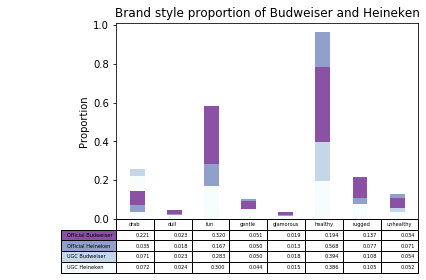

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
columns = ("drab", "dull", "fun", "gentle", "glamorous", "healthy", "rugged", "unhealthy")
rows = ["Official Budweiser","Official Heineken","UGC Budweiser","UGC Heineken"]

values = np.arange(0, 1, 0.2)
value_increment = 0.4

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.7, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) #+ 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset =data[row]
    cell_text.append(['%1.3f' % x for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
#cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Proportion")
plt.yticks([0,0.2,0.4,0.6,0.8,1.0])
plt.xticks([])
plt.title('Brand style proportion of Budweiser and Heineken')
plt.show()

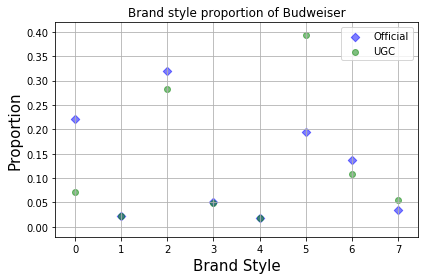

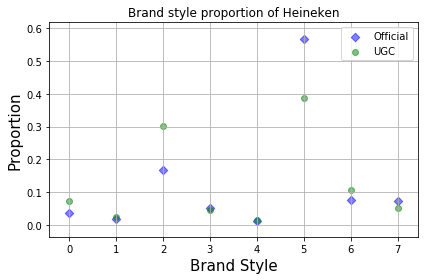

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
title=["Budweiser","Heineken"]
for i in [0,1]:
    fig, ax = plt.subplots()
    ax.scatter(range(8), data[i],marker="D",c="b",alpha=0.5)
    ax.scatter(range(8), data[i+2],marker="o",c="g",alpha=0.5)
    ax.set_xlabel('Brand Style', fontsize=15)
    ax.set_ylabel('Proportion', fontsize=15)
    ax.set_title('Brand style proportion of '+title[i])
    plt.legend(["Official","UGC"])
    ax.grid(True)
    fig.tight_layout()

    plt.show()